# Problem
<div>
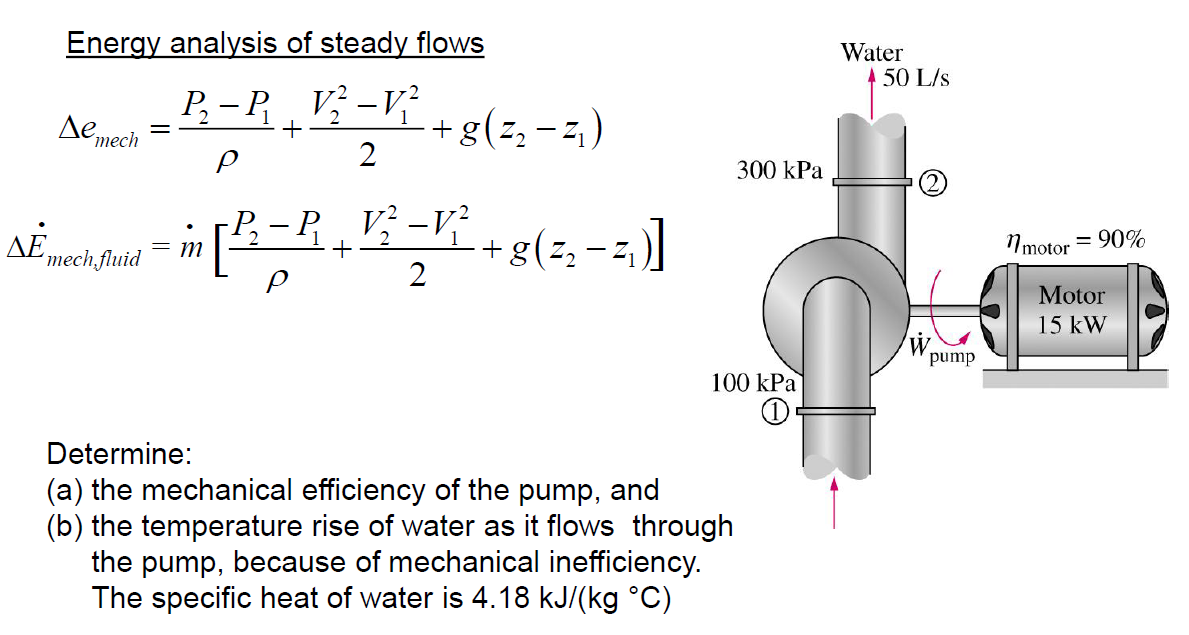
</div>

# Plan

## (a) determine the pump efficiency
The problem asks for the pump efficiency. The pump is connected with the motor, so we can start from the motor. For motor $$\eta_m = \dfrac{\dot{w}_{p,in}}{\dot{w}_{m,in}} => 0.9  =\dfrac{\dot{w}_{p,in}}{15 kW} => \dot{w}_{p,in} = 0.9\times 15 kW = 13.5 kW$$

for pump, as the output from the motor is the input for the pump, $$\eta_p = \dfrac{\dot{w}_{p,out}}{\dot{w}_{p,in}}$$, 
but how can I calculate the output power from the pump $\dot{w}_{p,out}$? The power is energy per time, and recognizing that Bernoulli's equation contains energy, (**reminder: the conditions to apply Bernoulli's equation: steady, incompressible, streamline, non-viscous**)

based on conservation of energy, the energy comes in with the fluid plus the effective work done by the pump should be equal to the energy of the fluid leaving the pump.

$$\dfrac{P_1}{\rho g}+\dfrac{V_1^2}{2g}+z_1 + h_p = \dfrac{P_2}{\rho g}+\dfrac{V_2^2}{2g}+z_2$$
(**notice the wather head $h_p$ here, not $\dot{w}_{p,out}$, as the energy is converted with height**)

alternatively, you can write the energy balance per time in power: 

$$(P_1 + \dfrac{1}{2}\rho V_1^2 + \rho g z_1)Q +\dot{w}_{p,out} = (P_2 + \dfrac{1}{2}\rho V_2^2 + \rho g z_2)Q   $$ where $Q$ is the volume flow rate \[units: $m^3/s$\]. (**you can check the dimesion of each term**)

Compare the above two equations, you can get
$$\dot{w}_{p,out} = \rho Q g h_p = \dot{m}gh_p$$

Let us stick to the $h_p$ format, assuming the diameter of inlet/outlet are the same, we have $V_1 = V_2$, the height of the pump is relatively small, $z_1 \approx z_2$, so the water head $h_p$ can be found as 

$$h_p = \dfrac{P_2 - P_1}{\rho g}$$

## (b) determine the temperature rise

As the pump efficiency is not 100\%. The energy lost would be converted to heat. The heat $\Delta E$ to increase $\Delta T$ for water with given mass $m$ is $$\Delta E = cm\Delta T$$ where $c$ is the specific heat of water $4.18 kJ/(kg\cdot K)$
Take the time derivative from both side, we have
$$\Delta \dot{E} = c\dot{m}\Delta T$$ here the $\Delta \dot{E}$ is the power loss due to pump.

In [32]:
import handcalcs.render # render
from pint import UnitRegistry
u=UnitRegistry(auto_reduce_dimensions=True)

In [33]:
%%render
P_2 = 300*1e3*u.Pa # pressure at the oulet
P_1 = 100*1e3*u.Pa # pressure at the inlet

rho = 1000*u.kg/u.m**3 # density of water
g = 9.81 *u.m/u.s**2 # gravity constant
h_p = (P_2-P_1)/rho/g # water head from the pump

pIn_motor = 15*u.kW # power input to motor
eta_m = 0.9

pOut_motor = eta_m*pIn_motor # power output from motor, same as input for pump

Q = 50 *u.L/u.s # volume flow rate

massRate = rho*Q  # mass flow rate

pOut_pump = massRate*g*h_p # the useful energy generated by pump
eta_p = massRate*g*h_p/pOut_motor

heatLoss = pOut_motor - pOut_pump  # heat loss power

c = 4.18*u.kJ/u.kg/u.degK

deltaTemp = heatLoss/c/massRate 

<IPython.core.display.Latex object>

In [6]:
h_p.to('m')

20.38735983690112 <Unit('meter')>

In [34]:
print(f'the pump efficiency is {eta_p}')

the pump efficiency is 0.7407407407407409 dimensionless


In [38]:
dT = deltaTemp.to('kelvin')
print(f'the increased temperature for water is {dT}')


the increased temperature for water is 0.016746411483253575 kelvin
